In [278]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [279]:
np.random.seed = 42
IMG_WIDTH = 500
IMG_HEIGHT = 500
IMG_CHANNELS = 3
f_size = 15


In [280]:
TRAIN_FILMED_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\model_at_tree_5_pics\\filmed"
TRAIN_CLEAN_PATH = "D:\\Main\\MA_PROGR\\Data\\Train\\UNet_Train\\model_at_tree_5_pics\\clean_aligned"


In [281]:
train_filmed_imgs = []
train_clean_imgs = []


In [282]:
OFFSET = 400

for addr_filmed in os.listdir(TRAIN_FILMED_PATH):
    img = cv2.imread(f"{TRAIN_FILMED_PATH}\{addr_filmed}", cv2.IMREAD_GRAYSCALE)
    train_filmed_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])

for addr_clean in os.listdir(TRAIN_CLEAN_PATH):
    img = cv2.imread(f"{TRAIN_CLEAN_PATH}\{addr_clean}", cv2.IMREAD_GRAYSCALE)
    train_clean_imgs.append(
        img[OFFSET:IMG_WIDTH+OFFSET, OFFSET:IMG_HEIGHT+OFFSET])


In [283]:
img_filmed = train_filmed_imgs[0]
img_clean = train_clean_imgs[0]

In [284]:
#  img = img[:, :, 0]

In [285]:
def f2pd(fourier_array):
    # transoforms an fourier image into pixel domain in order
    # to display it
    return (np.log(abs(fourier_array)))

In [307]:
my_complex = 0+0j


print(abs(my_complex))
print(np.log(abs(my_complex)))

0.0
-inf


C:\Users\Steffen\AppData\Local\Temp\ipykernel_8100\2266317585.py:5: RuntimeWarning: divide by zero encountered in log
  print(np.log(abs(my_complex)))


In [304]:
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 1)
mask


<tf.Tensor: shape=(500, 500), dtype=complex64, numpy=
array([[1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       ...,
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, ..., 1.+0.j, 1.+0.j, 1.+0.j]],
      dtype=complex64)>

Text(0.5, 1.0, 'Zurück zu normal')

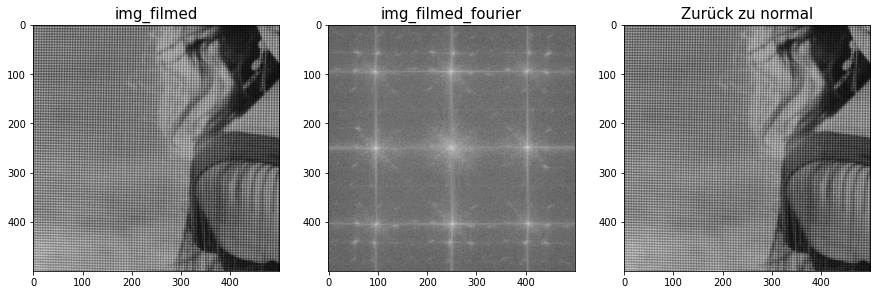

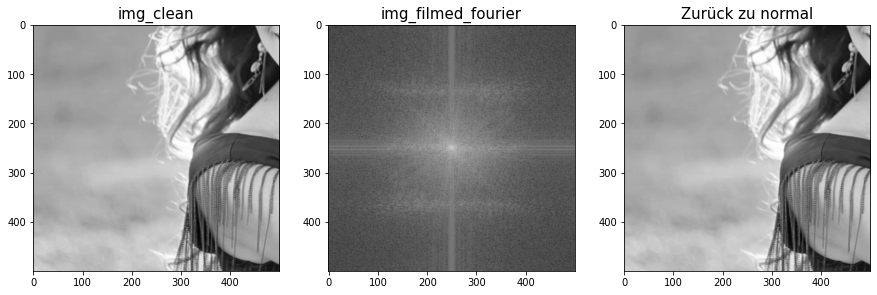

In [286]:
img_filmed_fourier = np.fft.fftshift(np.fft.fft2(img_filmed))
img_clean_fourier = np.fft.fftshift(np.fft.fft2(img_clean))
# print(img_filmed)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow((img_filmed), cmap = 'gray')
ax[0].set_title('img_filmed', fontsize=f_size)
ax[1].imshow(f2pd(img_filmed_fourier), cmap='gray')
ax[1].set_title('img_filmed_fourier', fontsize=f_size)
ax[2].imshow(abs(np.fft.ifft2(img_filmed_fourier)),
             cmap='gray')
ax[2].set_title('Zurück zu normal',
                fontsize=f_size)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow((img_clean), cmap = 'gray')
ax[0].set_title('img_clean', fontsize=f_size)
ax[1].imshow(f2pd(img_clean_fourier), cmap='gray')
ax[1].set_title('img_filmed_fourier', fontsize=f_size)
ax[2].imshow(abs(np.fft.ifft2(img_clean_fourier)),
             cmap='gray')
ax[2].set_title('Zurück zu normal',
                fontsize=f_size)


In [287]:
def soft_blending(clean, filmed, ones_t2c, mask):
    zw1 = tf.math.subtract(ones_t2c, mask)
    zw1 = tf.math.multiply(zw1, clean)

    zw2 = tf.multiply(mask, filmed)
    return tf.math.add(zw1, zw2)

ones = tf.ones((IMG_WIDTH, IMG_HEIGHT))
zeros = tf.zeros((IMG_WIDTH, IMG_HEIGHT))
ones_t2c = tf.complex(ones, zeros)

filmed = tf.multiply(ones_t2c, 5)
clean = tf.multiply(ones_t2c, 10)

mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0)

print(mask)

result = soft_blending(clean, filmed, ones_t2c, mask)



tf.Tensor(
[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]], shape=(500, 500), dtype=complex64)


mask: 0
[[-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 ...
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]
 [-inf -inf -inf ... -inf -inf -inf]]
mask: 0.5
mask: 1


C:\Users\Steffen\AppData\Local\Temp\ipykernel_8100\166705893.py:4: RuntimeWarning: divide by zero encountered in log
  return (np.log(abs(fourier_array)))


Text(0.5, 1.0, 'zurück')

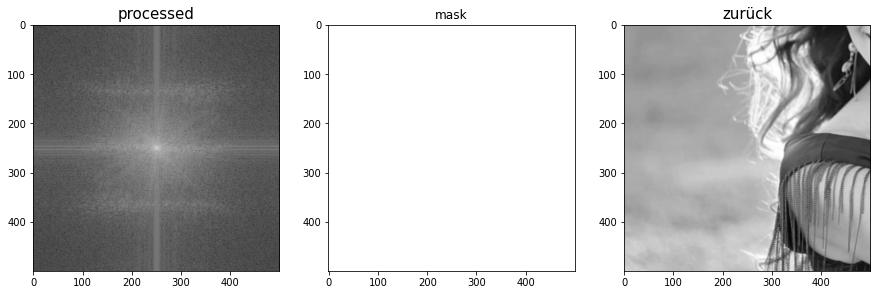

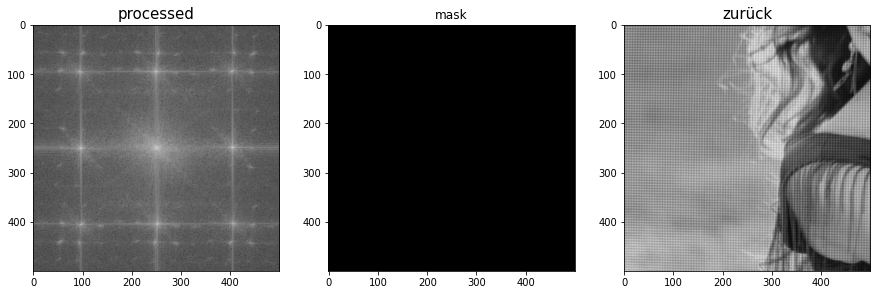

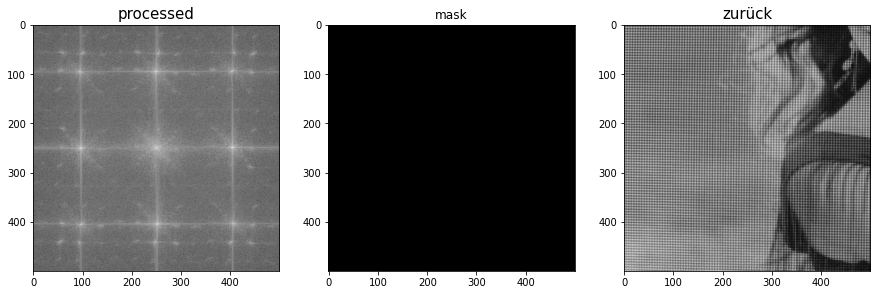

In [288]:


print("mask: 0")
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0)
print(f2pd(mask))
processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(f2pd(processed), cmap='gray')
ax[0].set_title('processed', fontsize=f_size)
ax[1].imshow(f2pd(mask), cmap="gray")
ax[1].set_title("mask")
ax[2].imshow(abs(np.fft.ifft2(processed)), cmap='gray')
ax[2].set_title('zurück', fontsize=f_size)

print("mask: 0.5")
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 0.5)
processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(f2pd(processed), cmap='gray')
ax[0].set_title('processed', fontsize=f_size)
ax[1].imshow(f2pd(mask), cmap="gray")
ax[1].set_title("mask")
ax[2].imshow(abs(np.fft.ifft2(processed)), cmap='gray')
ax[2].set_title('zurück', fontsize=f_size)

print("mask: 1")
mask = tf.complex(ones, zeros)
mask = tf.multiply(mask, 1)
processed = soft_blending(img_clean_fourier, img_filmed_fourier, ones_t2c, mask)

fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(f2pd(processed), cmap='gray')
ax[0].set_title('processed', fontsize=f_size)
ax[1].imshow(f2pd(mask), cmap="gray")
ax[1].set_title("mask")
ax[2].imshow(abs(np.fft.ifft2(processed)), cmap='gray')
ax[2].set_title('zurück', fontsize=f_size)



## Model Test

In [289]:

input_1 = keras.Input(shape=(1), batch_size=1)
input_2 = keras.Input(shape=(1), batch_size=1)
input_3 = keras.Input(shape=(1), batch_size=1)

output_1 = input_1 + input_2 + input_3


model_1 = keras.Model(inputs=[input_1, input_2, input_3], outputs=[output_1])

execute_model_1 = tf.function(model_1)

execute_model_1([1,2,3])




<tf.Tensor: shape=(), dtype=float32, numpy=6.0>